# Mini Project II – Students Performance

## Step0 - Installations

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

## Step1- Data Processing/Analysis

In [32]:
df = pd.read_csv('MP2_Data.csv')
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ML-2020-60,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,28,0,22,0,1,0,0,0,0
103,ML-2020-58,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,3,0,0,0,0
104,ML-2020-94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
105,ML-2020-9,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,6,0,0,0,0


In [33]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
missing_values

Missing values in each column:


,0
ID,0
Week2_Quiz1,0
Week3_MP1,0
Week3_PR1,0
Week5_MP2,0
Week5_PR2,0
Week7_MP3,0
Week7_PR3,0
Week4_Quiz2,0
Week6_Quiz3,0


### Combining columns for better analysis

In [34]:
df_analysis = pd.DataFrame()

quiz_columns = [col for col in df.columns if col.endswith('Quiz1') or col.endswith('Quiz2') or col.endswith('Quiz3')]
df_analysis['Quiz'] = df[quiz_columns].mean(axis=1)

mp_columns = [col for col in df.columns if col.endswith('MP1') or col.endswith('MP2') or col.endswith('MP3')]
df_analysis['MP'] = df[mp_columns].mean(axis=1)

pr_columns = [col for col in df.columns if col.endswith('PR1') or col.endswith('PR2') or col.endswith('PR3')]
df_analysis['PR'] = df[pr_columns].mean(axis=1)

for stat in range(4):  # This will loop from 0 to 3
    stat_columns = [col for col in df.columns if col.endswith(f'Stat{stat}')]
    df_analysis[f'Stat{stat}'] = df[stat_columns].mean(axis=1)

for week in range(2, 10):  # This will loop from 2 to 9
    week_columns = [col for col in df.columns if col.startswith(f'Week{week}')]
    df_analysis[f'Week{week}'] = df[week_columns].mean(axis=1)


df_analysis['Grade'] = df['Grade']
df_analysis


,Quiz,MP,PR,Stat0,Stat1,Stat2,Stat3,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Grade
0,5.000000,17.656667,5.000000,13.111111,13.222222,0.888889,0.444444,8.600,9.000000,12.000,8.681667,13.0,4.980000,19.194,3.75,4
1,4.110000,18.366667,5.000000,51.666667,9.444444,1.888889,4.111111,17.066,21.833333,31.000,16.638333,18.0,12.545000,17.886,8.75,4
2,3.890000,18.423333,4.166667,18.777778,7.222222,0.888889,1.000000,7.334,8.166667,15.600,9.370000,8.2,7.591667,17.888,2.50,3
3,3.543333,18.340000,5.000000,61.444444,8.222222,1.888889,1.666667,9.900,17.666667,54.626,11.666667,25.4,13.003333,18.130,3.25,3
4,3.223333,14.360000,4.976667,16.555556,6.888889,0.777778,1.888889,0.000,8.666667,5.334,11.516667,9.6,12.818333,16.536,2.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.000000,0.000000,10.555556,6.000000,2.888889,0.444444,3.000,2.833333,7.000,2.166667,4.0,3.333333,10.000,0.25,0
103,0.000000,0.000000,0.000000,5.777778,1.444444,1.333333,0.000000,7.200,1.666667,3.200,0.000000,0.0,0.000000,0.000,0.75,0
104,0.000000,0.000000,0.000000,1.000000,0.000000,1.222222,0.000000,0.000,3.333333,0.000,0.000000,0.0,0.000000,0.000,0.00,0
105,0.000000,0.000000,0.000000,2.333333,0.000000,1.222222,0.555556,2.800,0.000000,0.000,2.000000,0.0,0.000000,0.000,1.50,0


Grade    1.000000
MP       0.981128
PR       0.925995
Week8    0.915055
Quiz     0.850059
Stat1    0.801245
Week3    0.742881
Stat0    0.720340
Week5    0.710686
Week7    0.707439
Week6    0.703477
Week4    0.699457
Week9    0.513054
Stat3    0.430672
Week2    0.429985
Stat2    0.169317
Name: Grade, dtype: float64


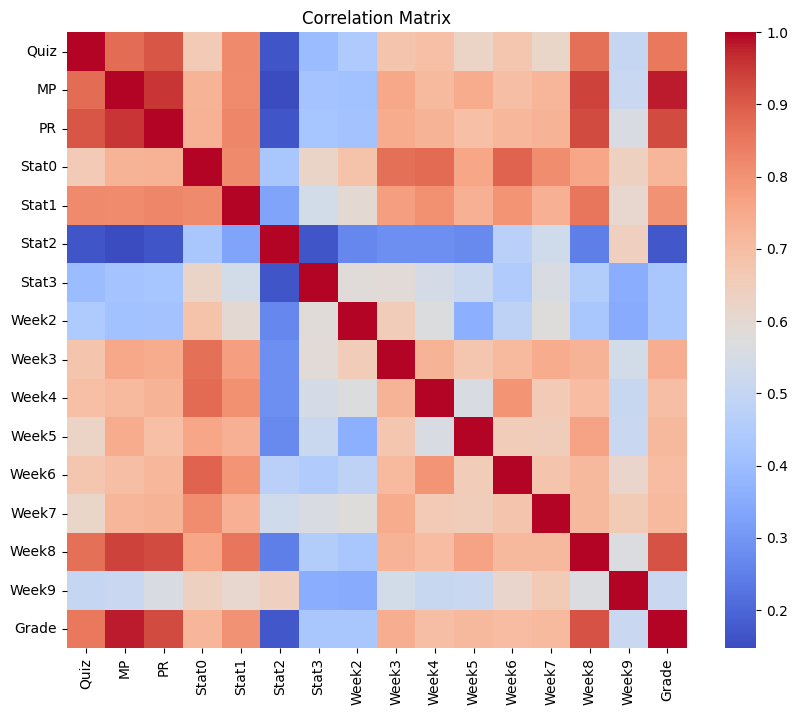

In [35]:
correlation_matrix = df_analysis.corr()
correlation_with_grade = correlation_matrix["Grade"].sort_values(ascending=False)
print(correlation_with_grade)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

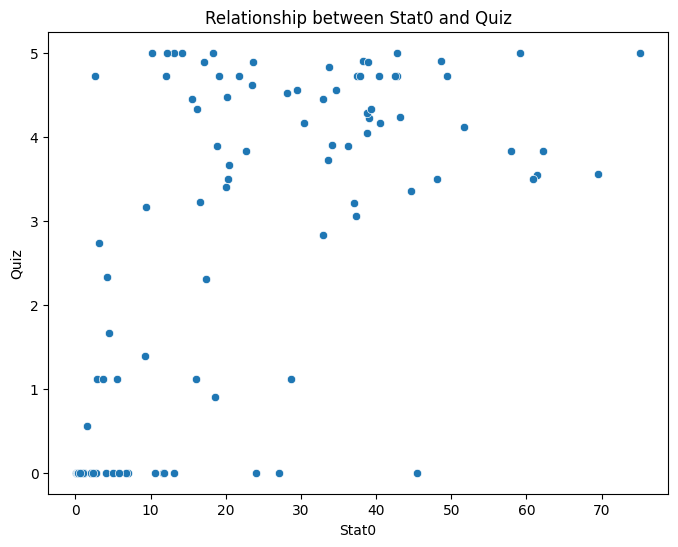

In [36]:
# To see if students viewing lecture content perform better in quizzes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stat0', y='Quiz', data=df_analysis)
plt.title('Relationship between Stat0 and Quiz')
plt.xlabel('Stat0')
plt.ylabel('Quiz')
plt.show()


## Continue Data processing

In [37]:
df = df.drop(columns=['ID'])

In [38]:
# Calculating correlation matrix to see the correlation between target class and the rest
correlation_matrix = df.corr()
correlation_with_grade = correlation_matrix["Grade"].sort_values(ascending=False)
print(correlation_with_grade)

Grade          1.000000
Week8_Total    0.972348
Week7_MP3      0.968130
Week5_MP2      0.953488
Week5_PR2      0.907837
Week3_MP1      0.901788
Week3_PR1      0.887352
Week7_PR3      0.865616
Week6_Quiz3    0.849920
Week4_Quiz2    0.810920
Week6_Stat1    0.771988
Week2_Quiz1    0.689783
Week4_Stat1    0.662946
Week3_Stat0    0.643789
Week6_Stat0    0.635807
Week4_Stat0    0.625359
Week3_Stat1    0.596824
Week5_Stat0    0.590146
Week8_Stat1    0.584425
Week9_Stat0    0.545532
Week9_Stat1    0.496753
Week5_Stat1    0.484030
Week8_Stat0    0.450807
Week7_Stat3    0.439733
Week7_Stat1    0.424807
Week2_Stat1    0.406120
Week7_Stat0    0.377195
Week2_Stat0    0.293296
Week2_Stat2    0.292262
Week6_Stat2    0.288761
Week4_Stat3    0.278034
Week6_Stat3    0.270239
Week5_Stat3    0.264079
Week1_Stat0    0.256311
Week8_Stat3    0.234907
Week3_Stat3    0.227106
Week2_Stat3    0.202950
Week4_Stat2    0.171987
Week9_Stat2    0.147822
Week9_Stat3    0.094227
Week7_Stat2    0.087466
Week5_Stat2    0

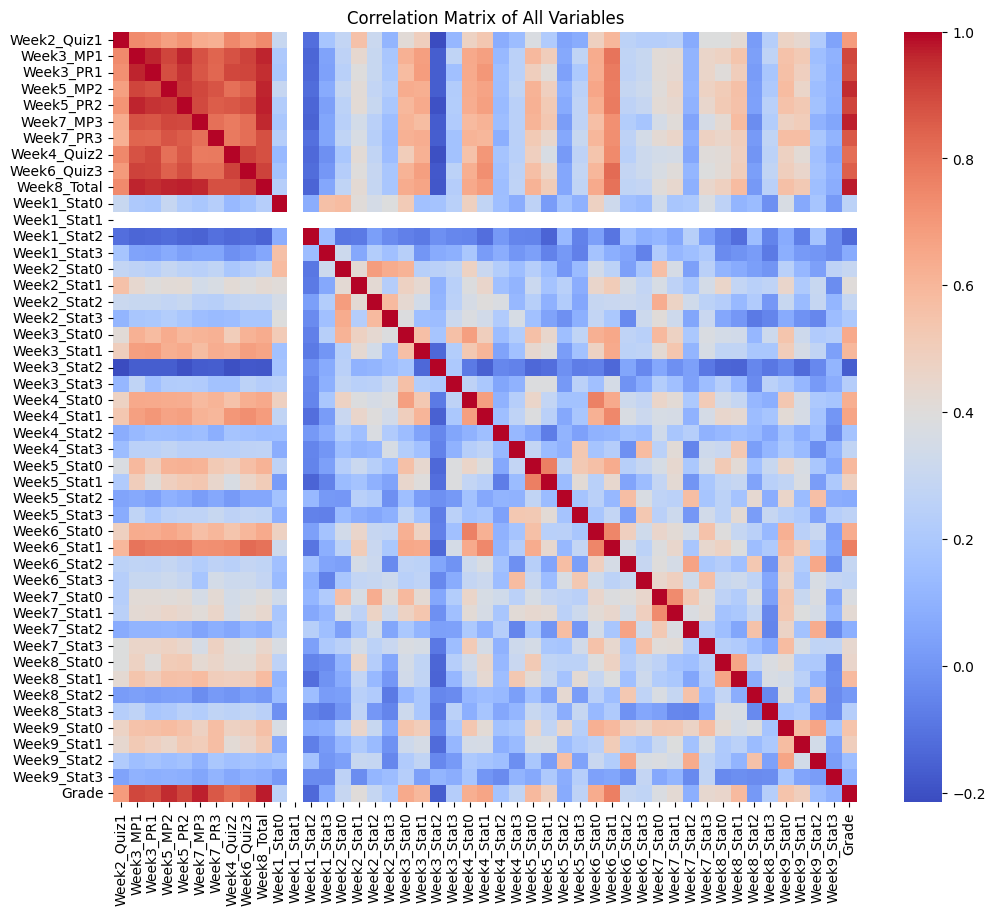

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Variables')
plt.show()


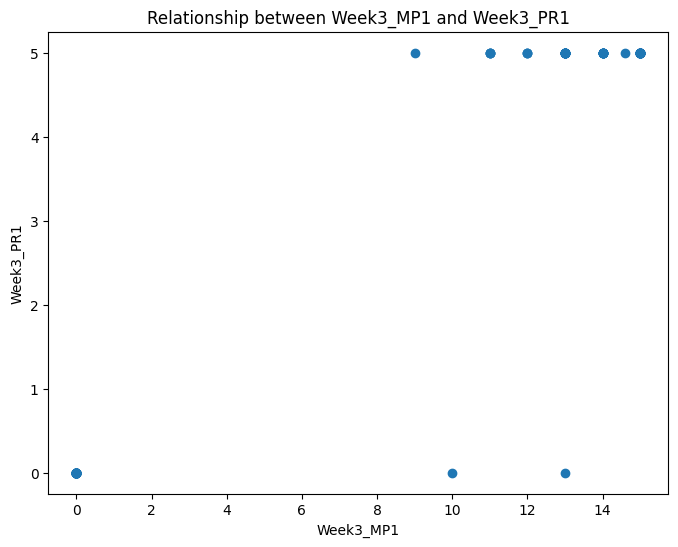

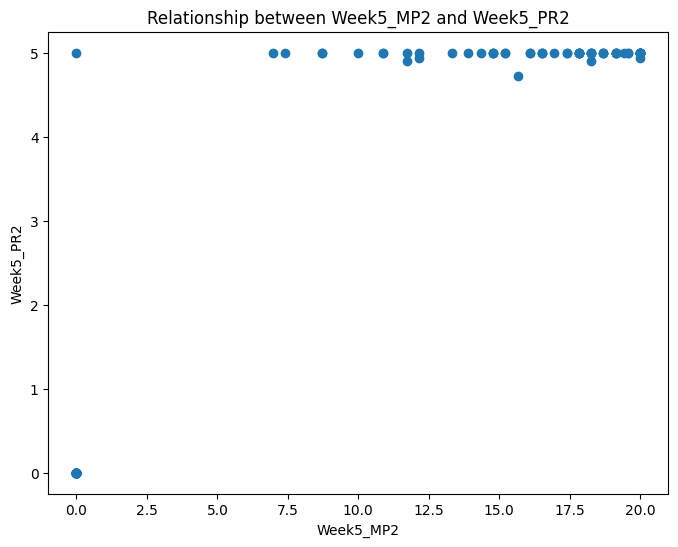

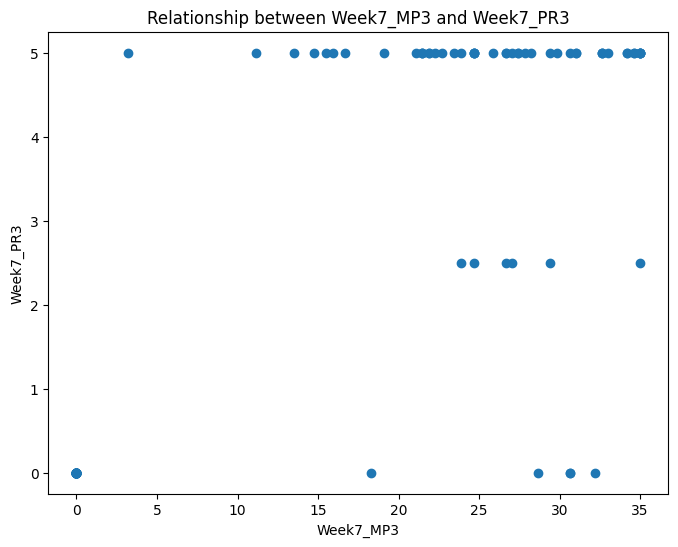

In [40]:
# Relationship between Week3_MP1 and Week3_PR1
plt.figure(figsize=(8, 6))
plt.scatter(df['Week3_MP1'], df['Week3_PR1'])
plt.xlabel('Week3_MP1')
plt.ylabel('Week3_PR1')
plt.title('Relationship between Week3_MP1 and Week3_PR1')
plt.show()

# Relationship between Week5_PR2 and Week5_MP2
plt.figure(figsize=(8, 6))
plt.scatter(df['Week5_MP2'], df['Week5_PR2'])
plt.xlabel('Week5_MP2')
plt.ylabel('Week5_PR2')
plt.title('Relationship between Week5_MP2 and Week5_PR2')
plt.show()


# Relationship between Week7_PR3 and Week7_MP3
plt.figure(figsize=(8, 6))
plt.scatter(df['Week7_MP3'], df['Week7_PR3'])
plt.xlabel('Week7_MP3')
plt.ylabel('Week7_PR3')
plt.title('Relationship between Week7_MP3 and Week7_PR3')
plt.show()


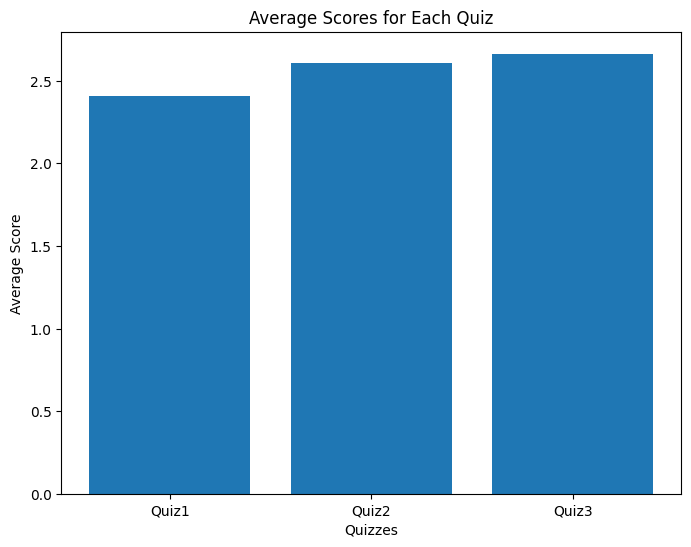

In [41]:
quiz_averages = {
    'Quiz1': df['Week2_Quiz1'].mean(),
    'Quiz2': df['Week4_Quiz2'].mean(),
    'Quiz3': df['Week6_Quiz3'].mean()
}

plt.figure(figsize=(8, 6))
plt.bar(quiz_averages.keys(), quiz_averages.values())
plt.xlabel('Quizzes')
plt.ylabel('Average Score')
plt.title('Average Scores for Each Quiz')
plt.show()


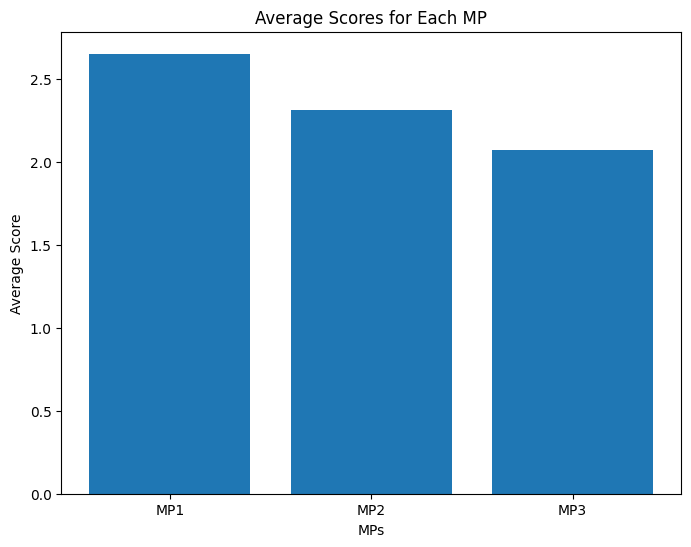

In [42]:
mp_averages = {
    'MP1': df['Week3_MP1'].mean()/3,
    'MP2': df['Week5_MP2'].mean()/4,
    'MP3': df['Week7_MP3'].mean()/7
}

plt.figure(figsize=(8, 6))
plt.bar(mp_averages.keys(), mp_averages.values())
plt.xlabel('MPs')
plt.ylabel('Average Score')
plt.title('Average Scores for Each MP')
plt.show()


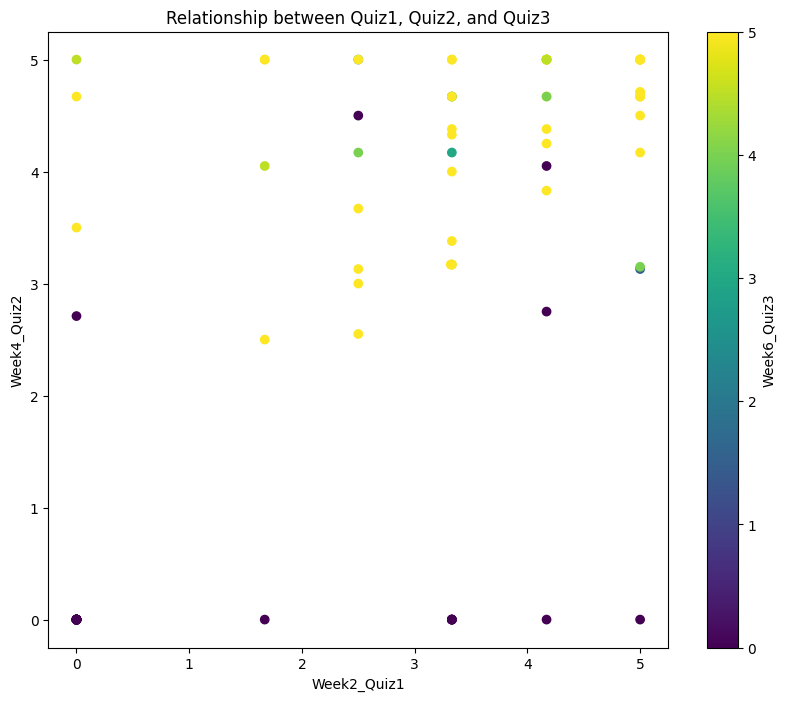

In [43]:
# Relationship between Week2_Quiz1, Week4_Quiz2, and Week6_Quiz3
plt.figure(figsize=(10, 8))
plt.scatter(df['Week2_Quiz1'], df['Week4_Quiz2'], c=df['Week6_Quiz3'], cmap='viridis')
plt.xlabel('Week2_Quiz1')
plt.ylabel('Week4_Quiz2')
plt.title('Relationship between Quiz1, Quiz2, and Quiz3')
plt.colorbar(label='Week6_Quiz3')
plt.show()

In [44]:
# Dropping columns having correlation coefficient < 0.5
filtered_columns = correlation_with_grade[(correlation_with_grade > 0.5)].index
df_filtered = df[filtered_columns]
df_filtered.drop(columns=['Week8_Total'], inplace=True)
df_filtered

<ipython-input-44-1aae83ed2e42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Week8_Total'], inplace=True)


,Grade,Week7_MP3,Week5_MP2,Week5_PR2,Week3_MP1,Week3_PR1,Week7_PR3,Week6_Quiz3,Week4_Quiz2,Week6_Stat1,Week2_Quiz1,Week4_Stat1,Week3_Stat0,Week6_Stat0,Week4_Stat0,Week3_Stat1,Week5_Stat0,Week8_Stat1,Week9_Stat0
0,4,21.88,16.09,5.00,15.0,5.0,5.0,5.0,5.00,30,5.00,39,30,28,14,4,24,4,8
1,4,22.27,17.83,5.00,15.0,5.0,5.0,5.0,4.00,22,3.33,16,100,57,130,4,48,2,25
2,3,27.05,15.22,5.00,13.0,5.0,2.5,5.0,5.00,20,1.67,19,25,14,50,4,28,2,9
3,3,31.02,10.00,5.00,14.0,5.0,5.0,5.0,3.13,19,2.50,27,79,99,240,4,47,0,7
4,2,15.91,12.17,4.93,15.0,5.0,5.0,5.0,4.67,18,0.00,15,27,22,6,5,32,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,11,0.00,16,13,7,14,4,9,0,1
103,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0,0.00,0,10,0,5,0,0,0,3
104,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0,0.00,0,9,0,0,0,0,0,0
105,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0,0.00,0,0,0,0,0,1,0,6


## Step 2 – Data split: Training and Test sets   

In [45]:
# Dataset is small; therefore, instead of train-test-split, cross-validation is needed.
X = df_filtered.drop(columns=['Grade'])  # Features
y = df_filtered['Grade']  # Target

## Step 3 – Model Training

Target class has discrete values; therefore, this is actually a classification problem. However, final grade is usually calculated by rounding the sum of grades to the closest integer. For this reason, I used the following approach:
1. use regresseion to predict the final grade as a continious value.
2. round the value to the closest integer.
3. make the prediction based on the rounded value.

So we can say this is a hybrid approach including both regression and classification techniques. After trying this with two regression models, I trained two classification models as well.

### 1. Linear Regression

In [46]:
linear_model = make_pipeline(StandardScaler(), LinearRegression())

y_pred_linear_cv = cross_val_predict(linear_model, X, y, cv=5)

mse_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')

avg_mse = -np.mean(mse_scores)  # Convert negative MSE to positive
avg_r2 = np.mean(r2_scores)

# Round predictions to nearest integer
y_pred_rounded_linear = np.round(y_pred_linear_cv)

accuracy_linear_cv = accuracy_score(y, y_pred_rounded_linear)

print(f"Linear Regression - Average MSE (Cross-Validation): {avg_mse}")
print(f"Linear Regression - Average R² (Cross-Validation): {avg_r2}")
print(f"Linear Regression - Accuracy after rounding (Cross-Validation): {accuracy_linear_cv}")

Linear Regression - Average MSE (Cross-Validation): 0.14872809445269067
Linear Regression - Average R² (Cross-Validation): 0.7545527806796875
Linear Regression - Accuracy after rounding (Cross-Validation): 0.8504672897196262


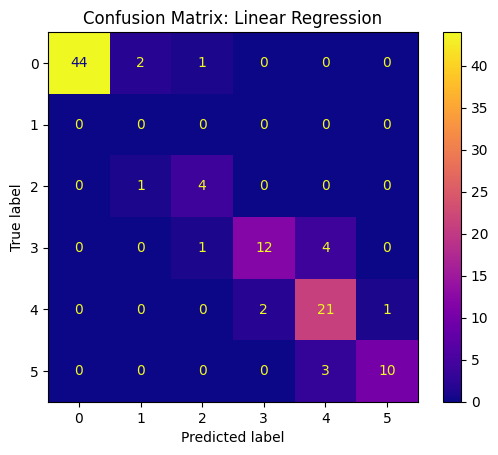

In [47]:
grade_labels = [0, 1, 2, 3, 4, 5]
conf_matrix = confusion_matrix(y, y_pred_rounded_linear, labels=grade_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grade_labels)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix: Linear Regression")
plt.show()

### 2. Random Forest Regression

In [48]:
rf_regressor = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

y_pred_rf_cv = cross_val_predict(rf_regressor, X, y, cv=5)

mse_scores_rf = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores_rf = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')

avg_mse_rf = -np.mean(mse_scores_rf)  # Convert negative MSE to positive
avg_r2_rf = np.mean(r2_scores_rf)

# Round predictions to nearest integer
y_pred_rounded_rf = np.round(y_pred_rf_cv)

accuracy_rf_cv = accuracy_score(y, y_pred_rounded_rf)

print(f"Random Forest Regressor - Average MSE (Cross-Validation): {avg_mse_rf}")
print(f"Random Forest Regressor - Average R² (Cross-Validation): {avg_r2_rf}")
print(f"Random Forest Regressor - Accuracy after rounding (Cross-Validation): {accuracy_rf_cv}")

Random Forest Regressor - Average MSE (Cross-Validation): 0.17667506493506493
Random Forest Regressor - Average R² (Cross-Validation): 0.7468445085532563
Random Forest Regressor - Accuracy after rounding (Cross-Validation): 0.7570093457943925


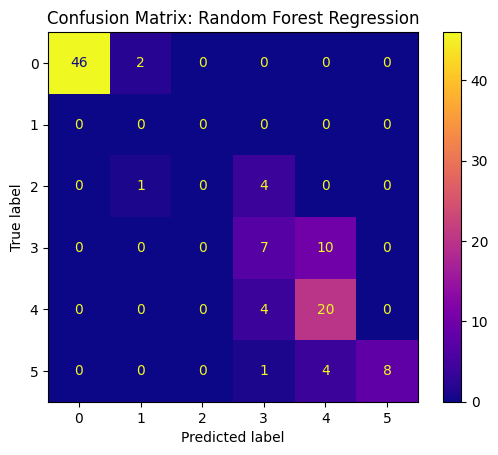

In [49]:
conf_matrix = confusion_matrix(y, y_pred_rounded_rf, labels=grade_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grade_labels)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix: Random Forest Regression")
plt.show()

## 3. Random Forest Classifier

In [50]:
rf_classifier = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

cv_scores_rf_classifier = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
y_pred_rf_cv = cross_val_predict(rf_classifier, X, y, cv=5)
avg_accuracy_rf_classifier = np.mean(cv_scores_rf_classifier)

print(f"Random Forest Classifier - Cross-Validation Accuracy Scores: {cv_scores_rf_classifier}")
print(f"Random Forest Classifier - Average Accuracy (Cross-Validation): {avg_accuracy_rf_classifier}")
print(classification_report(y, y_pred_rf_cv))


Random Forest Classifier - Cross-Validation Accuracy Scores: [0.81818182 0.72727273 0.76190476 0.85714286 0.76190476]
Random Forest Classifier - Average Accuracy (Cross-Validation): 0.7852813852813852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           2       0.00      0.00      0.00         5
           3       0.50      0.53      0.51        17
           4       0.60      0.75      0.67        24
           5       0.82      0.69      0.75        13

    accuracy                           0.79       107
   macro avg       0.58      0.59      0.59       107
weighted avg       0.76      0.79      0.77       107



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


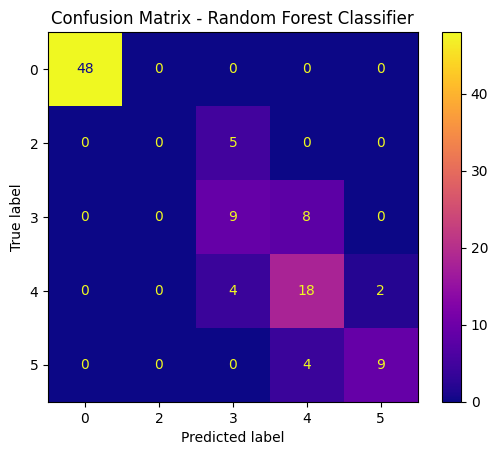

In [51]:
y_pred_rfc_cv = cross_val_predict(rf_classifier, X, y, cv=5)
conf_matrix_rf = confusion_matrix(y, y_pred_rfc_cv)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

## 4. XGBoost Classifier

In [52]:
# XGBoost requires label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

xgb_classifier = make_pipeline(StandardScaler(), xgb.XGBClassifier(random_state=42))

y_pred_xgb_cv = cross_val_predict(xgb_classifier, X, y_encoded, cv=5)

accuracy_scores_xgb = cross_val_score(xgb_classifier, X, y_encoded, cv=5, scoring='accuracy')
avg_accuracy_xgb = np.mean(accuracy_scores_xgb)

print(f"XGBoost Classifier - Cross-Validation Accuracy Scores: {accuracy_scores_xgb}")
print(f"XGBoost Classifier - Average Accuracy (Cross-Validation): {avg_accuracy_xgb}")
print(classification_report(y_encoded, y_pred_xgb_cv))

XGBoost Classifier - Cross-Validation Accuracy Scores: [0.72727273 0.68181818 0.76190476 0.76190476 0.80952381]
XGBoost Classifier - Average Accuracy (Cross-Validation): 0.7484848484848484
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.00      0.00      0.00         5
           2       0.47      0.53      0.50        17
           3       0.58      0.62      0.60        24
           4       0.62      0.62      0.62        13

    accuracy                           0.75       107
   macro avg       0.53      0.55      0.54       107
weighted avg       0.72      0.75      0.73       107



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


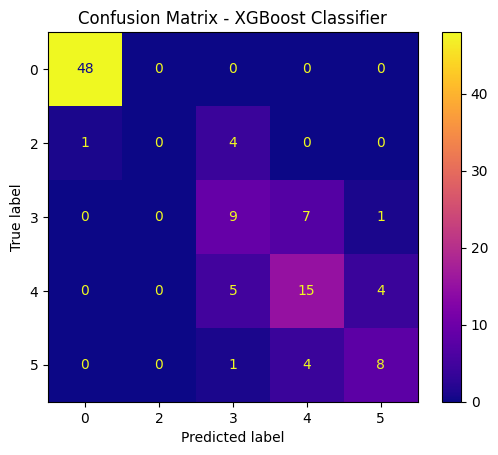

In [53]:
conf_matrix_xgb = confusion_matrix(y_encoded, y_pred_xgb_cv)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

## Step 4 –  Performance Evaluation  

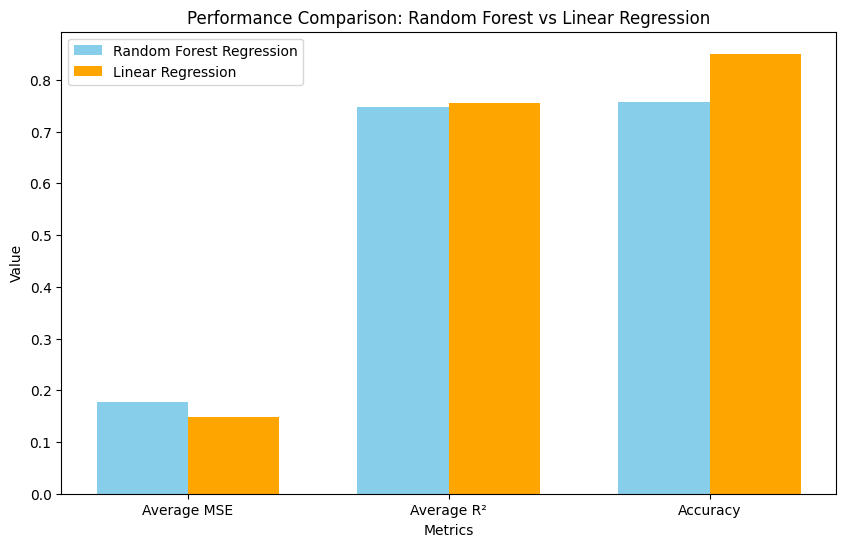

In [54]:
metrics = ['Average MSE', 'Average R²', 'Accuracy']
rf_values = [avg_mse_rf, avg_r2_rf, accuracy_rf_cv]
linear_values = [avg_mse, avg_r2, accuracy_linear_cv]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, rf_values, width=0.35, label='Random Forest Regression', color='skyblue')
plt.bar([i + 0.35 for i in x], linear_values, width=0.35, label='Linear Regression', color='orange')

plt.xticks([i + 0.175 for i in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: Random Forest vs Linear Regression')
plt.legend()
plt.show()


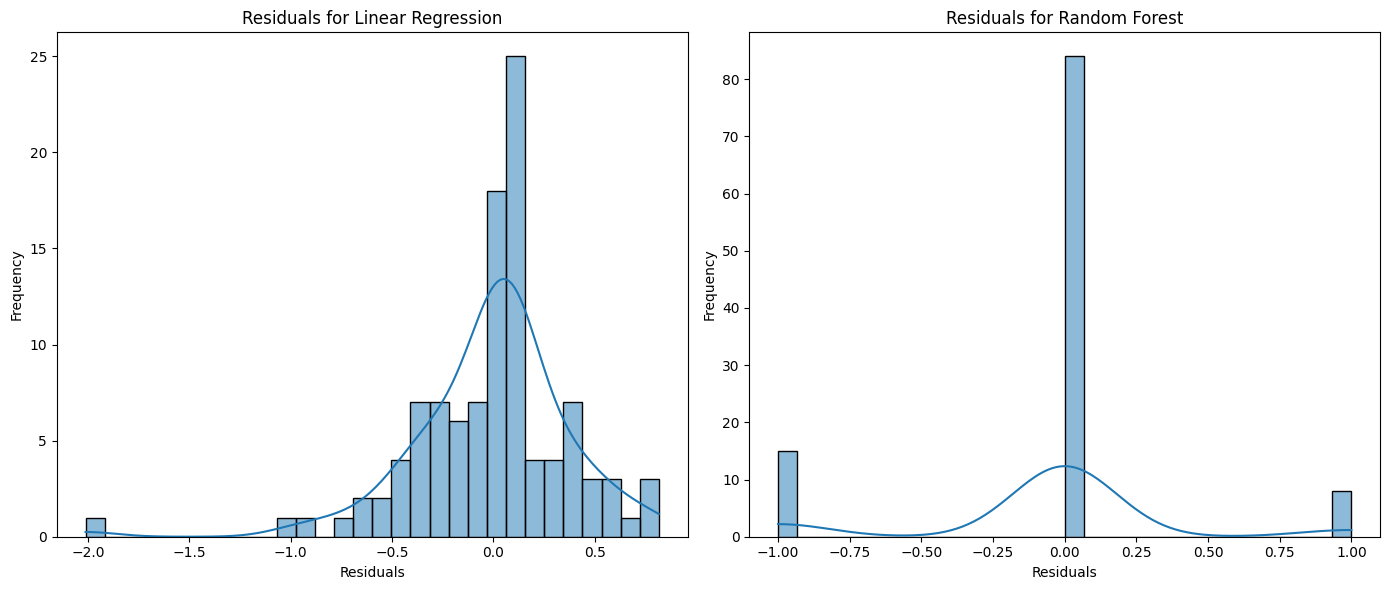

In [55]:
# Function to plot residuals for both models
def plot_residuals_comparison(y_true_linear, y_pred_linear, y_true_rf, y_pred_rf):
    residuals_linear = y_true_linear - y_pred_linear
    residuals_rf = y_true_rf - y_pred_rf

    plt.figure(figsize=(14, 6))

    # Linear Regression residuals
    plt.subplot(1, 2, 1)
    sns.histplot(residuals_linear, kde=True, bins=30)
    plt.title('Residuals for Linear Regression')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Random Forest residuals
    plt.subplot(1, 2, 2)
    sns.histplot(residuals_rf, kde=True, bins=30)
    plt.title('Residuals for Random Forest')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_residuals_comparison(y, y_pred_linear_cv, y, y_pred_rf_cv)

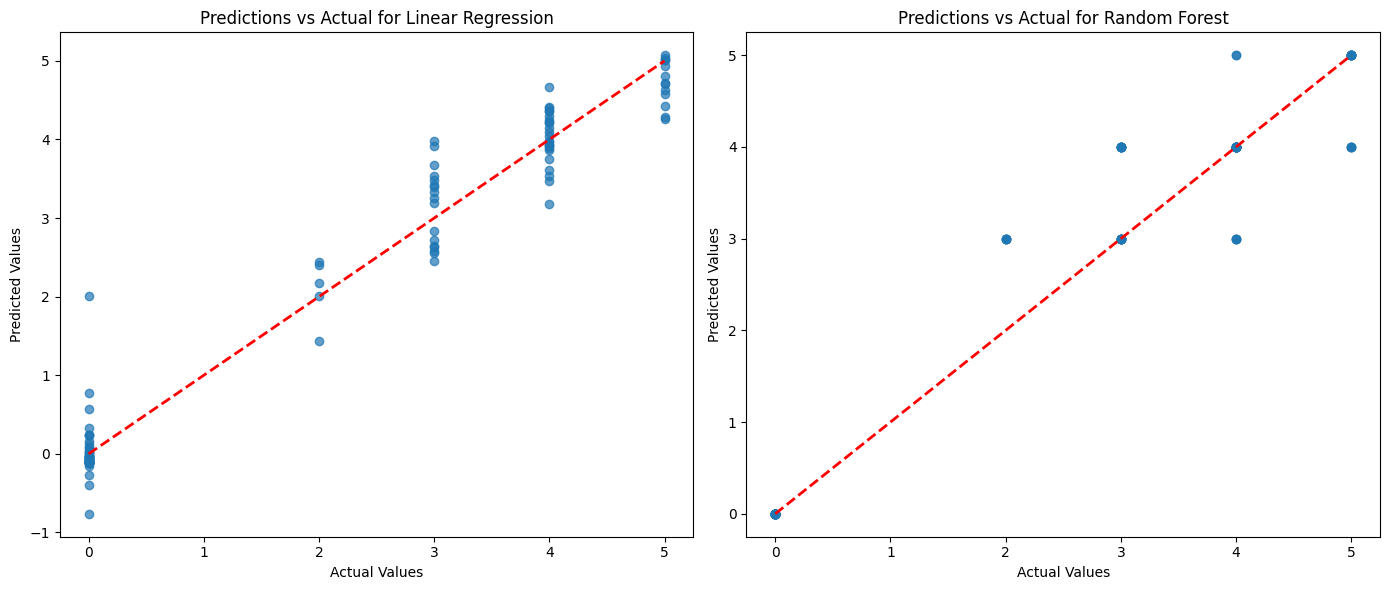

In [56]:
# Function to plot predictions vs actual for both models
def plot_predictions_comparison(y_true_linear, y_pred_linear, y_true_rf, y_pred_rf):
    plt.figure(figsize=(14, 6))

    # Linear Regression
    plt.subplot(1, 2, 1)
    plt.scatter(y_true_linear, y_pred_linear, alpha=0.7)
    plt.plot([y_true_linear.min(), y_true_linear.max()], [y_true_linear.min(), y_true_linear.max()], 'r--', lw=2)
    plt.title('Predictions vs Actual for Linear Regression')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Random Forest
    plt.subplot(1, 2, 2)
    plt.scatter(y_true_rf, y_pred_rf, alpha=0.7)
    plt.plot([y_true_rf.min(), y_true_rf.max()], [y_true_rf.min(), y_true_rf.max()], 'r--', lw=2)
    plt.title('Predictions vs Actual for Random Forest')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

plot_predictions_comparison(y, y_pred_linear_cv, y, y_pred_rf_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

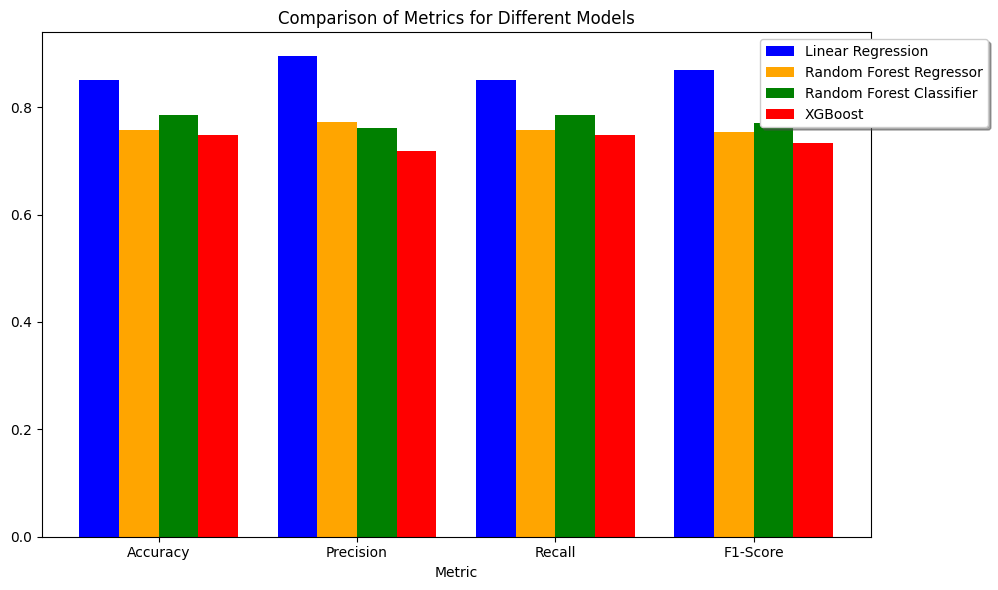

In [57]:
# Dictionary to store metrics for each model
metrics = {
    'Linear Regression': [],
    'Random Forest Regressor': [],
    'Random Forest Classifier': [],
    'XGBoost': []
}

# Function to calculate and store metrics for a model
def calculate_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    metrics[model_name].extend([accuracy, precision, recall, f1])


calculate_metrics('Random Forest Classifier', y, y_pred_rfc_cv)
calculate_metrics('XGBoost', y_encoded, y_pred_xgb_cv)
calculate_metrics('Linear Regression', y, y_pred_rounded_linear)
calculate_metrics('Random Forest Regressor', y, y_pred_rounded_rf)

# Plot comparison for each metric
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_list))
bar_width = 0.2


fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 1.5*bar_width, metrics['Linear Regression'], bar_width, label='Linear Regression', color='blue')
ax.bar(x - 0.5*bar_width, metrics['Random Forest Regressor'], bar_width, label='Random Forest Regressor', color='orange')
ax.bar(x + 0.5*bar_width, metrics['Random Forest Classifier'], bar_width, label='Random Forest Classifier', color='green')
ax.bar(x + 1.5*bar_width, metrics['XGBoost'], bar_width, label='XGBoost', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_title('Comparison of Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics_list)

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

## Step 5 – Important features  

<ipython-input-58-9e9b4ec369ef>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Coefficient', y='Feature', data=top_3_features, palette='Blues_d')


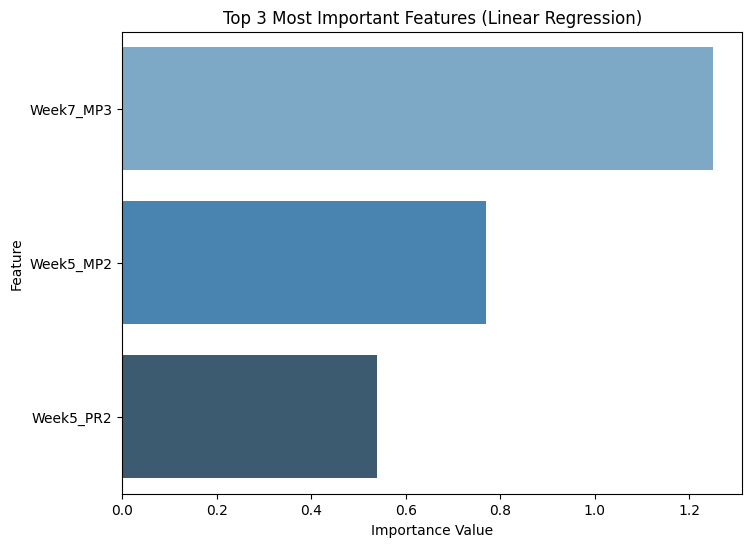

In [58]:
linear_model.fit(X, y)
linear_reg = linear_model.named_steps['linearregression']
coefficients = linear_reg.coef_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sorting the features by the absolute value of their coefficients to determine importance
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

top_3_features = feature_importance_df.head(3)

plt.figure(figsize=(8, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=top_3_features, palette='Blues_d')
plt.title('Top 3 Most Important Features (Linear Regression)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()


<ipython-input-59-3b81cd0bf6cd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_3_rf_features, palette='Greens_d')


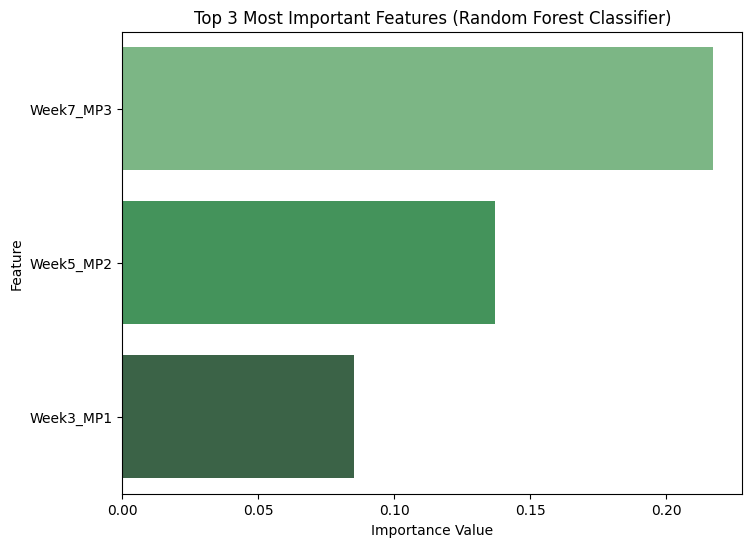

In [59]:
rf_classifier.fit(X, y)
rf_model = rf_classifier.named_steps['randomforestclassifier']
importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Replace with actual feature names if necessary
    'Importance': importances
})

rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
top_3_rf_features = rf_feature_importance_df.head(3)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_3_rf_features, palette='Greens_d')
plt.title('Top 3 Most Important Features (Random Forest Classifier)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

<ipython-input-60-72ac13cab591>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_3_xgb_features, palette='Oranges_d')


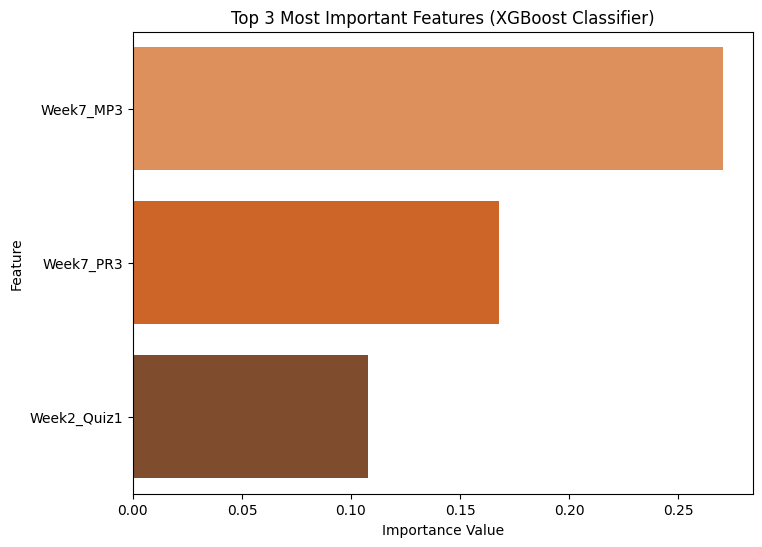

In [60]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X, y_encoded)
xgb_importances = xgb_classifier.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
})


xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)
top_3_xgb_features = xgb_feature_importance_df.head(3)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_3_xgb_features, palette='Oranges_d')
plt.title('Top 3 Most Important Features (XGBoost Classifier)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()
